In [76]:
# Import required libraries
from pymongo import MongoClient
import pandas as pd
from config import MONGODB_URI
from datetime import datetime

# Connect to MongoDB
client = MongoClient(MONGODB_URI)  # Replace with your connection string
db = client['price_tracker']
collection = db['cypher']

# Specify the URL you want to query
target_url = "https://www.amazon.in/Dyazo-Computer-Adjustable-Ergonomic-Compatible/dp/B08LHTJTBB/?_encoding=UTF8&pd_rd_w=W9lV5&content-id=amzn1.sym.896d5395-8432-4167-910b-7f29905b1010&pf_rd_p=896d5395-8432-4167-910b-7f29905b1010&pf_rd_r=T8PMA4EZCD7KNBBGJYMN&pd_rd_wg=KCMYs&pd_rd_r=2c17dddf-c30f-41d6-954c-c1414d1186c6&ref_=pd_hp_d_atf_dealz_sv"  # Replace with your target URL

# Fetch data and unwind price history for specific URL
cursor = collection.aggregate([
    {'$match': {'product_url': target_url}},  # Filter for specific URL
    {'$unwind': '$price_history'},
    {'$project': {
        'value': '$price_history.value',
        'timestamp': '$price_history.timestamp',
        '_id': 0
    }}
])
# print(cursor)
# # Convert to DataFrame
df = pd.DataFrame(list(cursor))


# Convert timestamp to datetime and sort
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# Display results
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   value      7 non-null      float64       
 1   timestamp  7 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 244.0 bytes
None


In [77]:
df

,value,timestamp
0,399.0,2025-03-05 09:15:15.093
1,399.0,2025-03-05 09:17:58.585
2,399.0,2025-03-05 09:20:04.778
3,399.0,2025-03-05 09:27:23.215
4,399.0,2025-03-05 09:29:35.079
5,399.0,2025-03-05 09:30:09.933
6,399.0,2025-03-05 09:37:06.679


In [78]:
import pandas
import matplotlib.pyplot as plt

import prophet as pp

# impot

In [79]:
ts = df
ts = df[['timestamp', 'value']]  # Specify the desired column order

ts.columns = ['ds', 'y']
ts

,ds,y
0,2025-03-05 09:15:15.093,399.0
1,2025-03-05 09:17:58.585,399.0
2,2025-03-05 09:20:04.778,399.0
3,2025-03-05 09:27:23.215,399.0
4,2025-03-05 09:29:35.079,399.0
5,2025-03-05 09:30:09.933,399.0
6,2025-03-05 09:37:06.679,399.0


<Axes: xlabel='ds'>

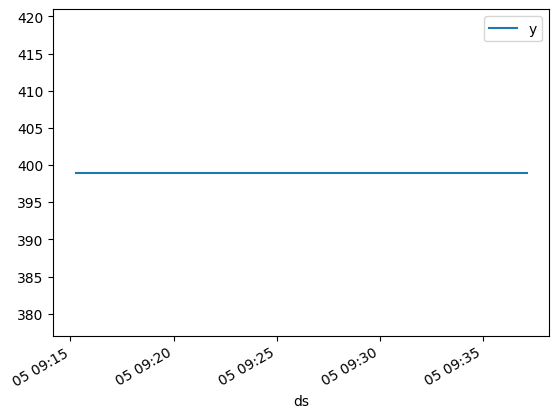

In [80]:
ts.set_index('ds').plot()

In [81]:
model = pp.Prophet()

In [82]:
model.fit(ts)

In [83]:
 future = model.make_future_dataframe(5,include_history=False)

In [84]:
forecast = model.predict(future)

In [85]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-03-06 09:37:06.679,399.0,398.999787,399.000193,398.999788,399.000193,0.0,0.0,0.0,0.0,0.0,0.0,399.0
1,2025-03-07 09:37:06.679,399.0,398.999289,399.000667,398.999289,399.000667,0.0,0.0,0.0,0.0,0.0,0.0,399.0
2,2025-03-08 09:37:06.679,399.0,398.998669,399.001268,398.998669,399.001268,0.0,0.0,0.0,0.0,0.0,0.0,399.0
3,2025-03-09 09:37:06.679,399.0,398.997878,399.001922,398.997878,399.001922,0.0,0.0,0.0,0.0,0.0,0.0,399.0
4,2025-03-10 09:37:06.679,399.0,398.997022,399.002791,398.997021,399.002791,0.0,0.0,0.0,0.0,0.0,0.0,399.0


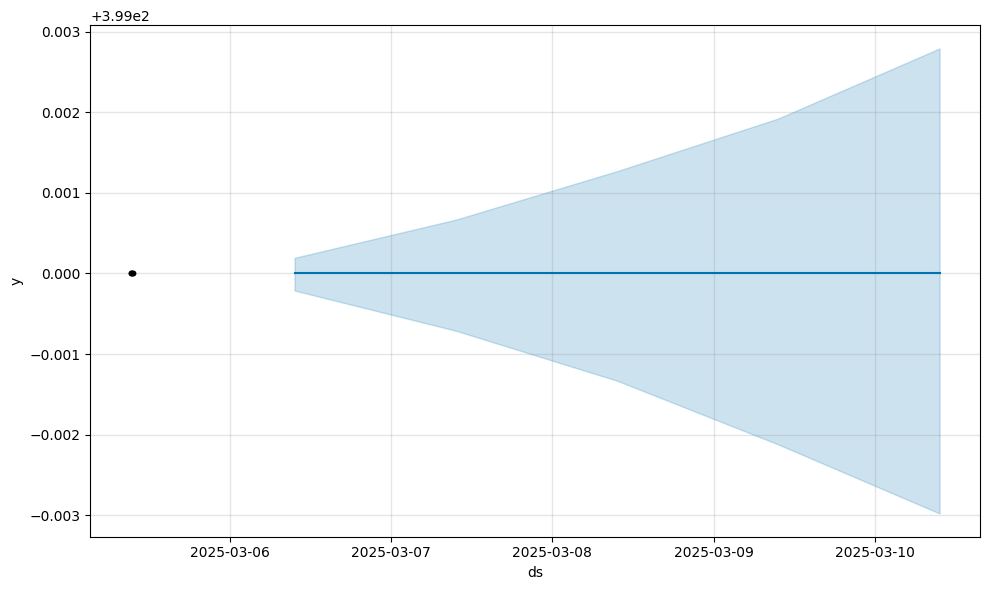

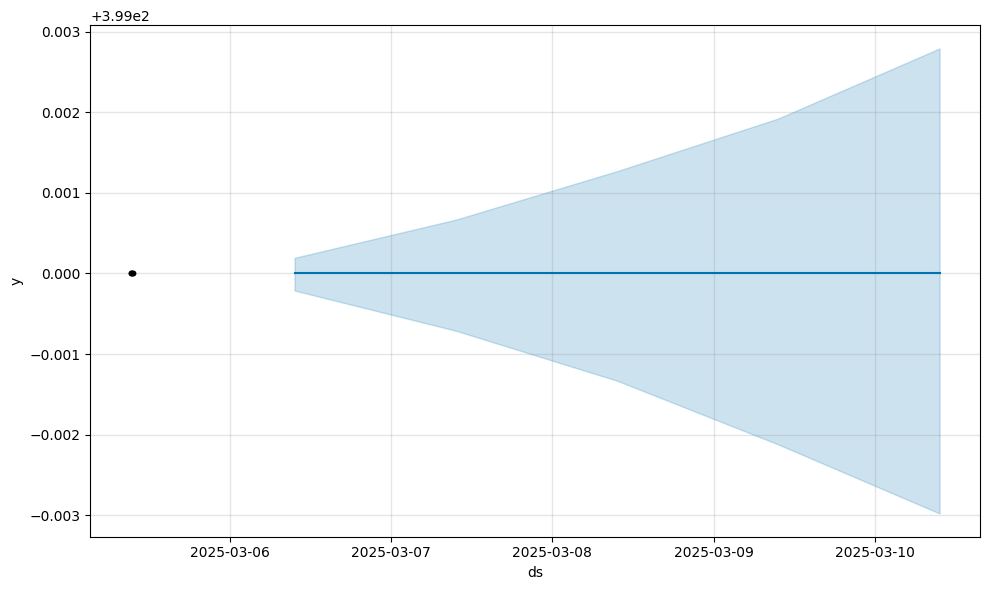

In [86]:
model.plot(forecast)

In [87]:
!pip install fastapi

  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.0 MB/s eta 0:00:001.9 MB/s eta 0:00:01
Using cached idna-3.10-py3-none-any.whl (70 kB)
